# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [30]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_80/result-lstm-tcp80-hl2-seq5-do0.2-oov1000-part_2_Treatment_testing_80.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_80/part_2_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [31]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.51-56899-178.255.83.1-80-tcp,0.036782,0,0,0,5256.630233,0,0,0
1,192.168.10.25-52301-172.217.10.8-80-tcp,0.081325,1,1,0,10730.229358,0,0,0
2,192.168.10.8-59456-172.224.8.45-80-tcp,0.044888,0,0,0,11409.679293,0,0,0
3,192.168.10.15-53094-162.208.20.178-80-tcp,0.033505,0,0,0,2633.835509,0,0,0
4,192.168.10.15-54809-52.84.145.119-80-tcp,0.041868,0,0,0,4928.438312,0,0,0


In [32]:
df_truth.head()

,ID,Label
0,192.168.10.51-56899-178.255.83.1-80-tcp,BENIGN
1,192.168.10.25-52301-172.217.10.8-80-tcp,BENIGN
2,192.168.10.8-59456-172.224.8.45-80-tcp,BENIGN
3,192.168.10.15-53094-162.208.20.178-80-tcp,BENIGN
4,192.168.10.15-54809-52.84.145.119-80-tcp,BENIGN


In [33]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        23856
0         5244
Name: count, dtype: int64

## Exploratory Data Analysis

In [34]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        23856
0         5244
Name: count, dtype: int64

In [35]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           23372
0            5728
Name: count, dtype: int64

In [36]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [37]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [38]:
df_pred["id"]

0          192.168.10.51-56899-178.255.83.1-80-tcp
1          192.168.10.25-52301-172.217.10.8-80-tcp
2           192.168.10.8-59456-172.224.8.45-80-tcp
3        192.168.10.15-53094-162.208.20.178-80-tcp
4         192.168.10.15-54809-52.84.145.119-80-tcp
                           ...                    
29095       192.168.10.9-6141-172.217.9.238-80-tcp
29096    192.168.10.19-57998-54.221.250.240-80-tcp
29097      192.168.10.9-21286-146.88.138.32-80-tcp
29098     192.168.10.5-51180-151.101.210.49-80-tcp
29099      192.168.10.8-49520-46.229.145.10-80-tcp
Name: id, Length: 29100, dtype: object

In [39]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0          192.168.10.51-56899-178.255.83.1-80-tcp
1          192.168.10.25-52301-172.217.10.8-80-tcp
2           192.168.10.8-59456-172.224.8.45-80-tcp
3        192.168.10.15-53094-162.208.20.178-80-tcp
4         192.168.10.15-54809-52.84.145.119-80-tcp
                           ...                    
29095       192.168.10.9-6141-172.217.9.238-80-tcp
29096    192.168.10.19-57998-54.221.250.240-80-tcp
29097      192.168.10.9-21286-146.88.138.32-80-tcp
29098     192.168.10.5-51180-151.101.210.49-80-tcp
29099      192.168.10.8-49520-46.229.145.10-80-tcp
Name: ID, Length: 29100, dtype: object

In [40]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [41]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [42]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
5915,172.16.0.1-33888-192.168.10.50-80-tcp,0.111111,1,1,1,15630.307500,1,0,0,1
5916,172.16.0.1-33888-192.168.10.50-80-tcp,0.111111,1,1,1,15630.307500,1,0,0,1
5917,172.16.0.1-33888-192.168.10.50-80-tcp,0.111111,1,1,1,15630.307500,1,0,0,1
5918,172.16.0.1-33888-192.168.10.50-80-tcp,0.111111,1,1,1,15630.307500,1,0,0,1
5919,172.16.0.1-48030-192.168.10.50-80-tcp,0.179191,1,1,1,19871.530792,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
67449,172.16.0.1-54546-192.168.10.50-80-tcp,0.144330,1,1,1,19325.849650,1,1,1,1
67450,172.16.0.1-42832-192.168.10.50-80-tcp,0.122222,1,1,1,17600.538028,1,1,0,1
67451,172.16.0.1-42832-192.168.10.50-80-tcp,0.122222,1,1,1,17600.538028,1,1,0,1
67452,172.16.0.1-42832-192.168.10.50-80-tcp,0.122222,1,1,1,17600.538028,1,1,0,1


In [43]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-56899-178.255.83.1-80-tcp,0.036782,0,0,0,5256.630233,0,0,0,0
1,192.168.10.25-52301-172.217.10.8-80-tcp,0.081325,1,1,0,10730.229358,0,0,0,0
2,192.168.10.8-59456-172.224.8.45-80-tcp,0.044888,0,0,0,11409.679293,0,0,0,0
3,192.168.10.15-53094-162.208.20.178-80-tcp,0.033505,0,0,0,2633.835509,0,0,0,0
4,192.168.10.15-54809-52.84.145.119-80-tcp,0.041868,0,0,0,4928.438312,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71067,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0
71068,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0
71069,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0
71070,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0


In [44]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.51-56899-178.255.83.1-80-tcp,0.036782,0,0,0,5256.630233,0,0,0,0
1,192.168.10.25-52301-172.217.10.8-80-tcp,0.081325,1,1,0,10730.229358,0,0,0,0
2,192.168.10.8-59456-172.224.8.45-80-tcp,0.044888,0,0,0,11409.679293,0,0,0,0
3,192.168.10.15-53094-162.208.20.178-80-tcp,0.033505,0,0,0,2633.835509,0,0,0,0
4,192.168.10.15-54809-52.84.145.119-80-tcp,0.041868,0,0,0,4928.438312,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
71067,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0
71068,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0
71069,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0
71070,192.168.10.5-51180-151.101.210.49-80-tcp,0.015849,0,0,0,2085.723485,0,0,0,0


In [45]:
df_pred[['Label']].value_counts()

Label
1        61539
0         9533
Name: count, dtype: int64

In [46]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [47]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [48]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
71067,0
71068,0
71069,0
71070,0


### Detection Rate

In [49]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9903313346008222
Recall-Binary-b_iqr: 0.9877151074928094
Recall-Binary-b_zscore: 0.9685565251304051
Recall-Floating-f_mean: 0.8864784933131835
Recall-Floating-f_iqr: 0.7786444368611775
Recall-Floating-f_zscore: 0.25448902322104683


### Confussion Matrix

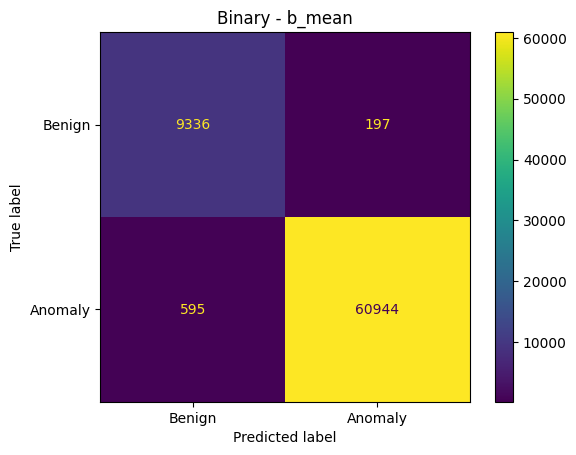

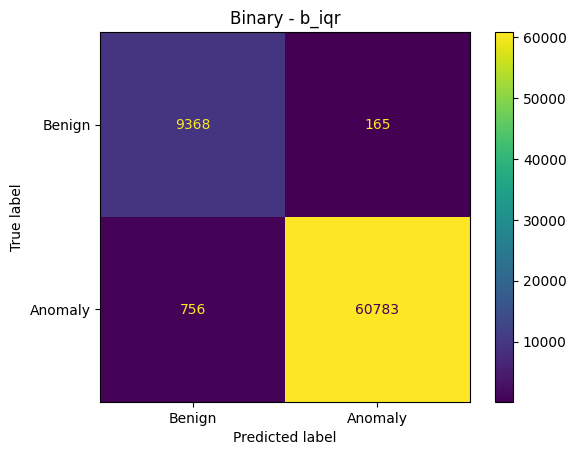

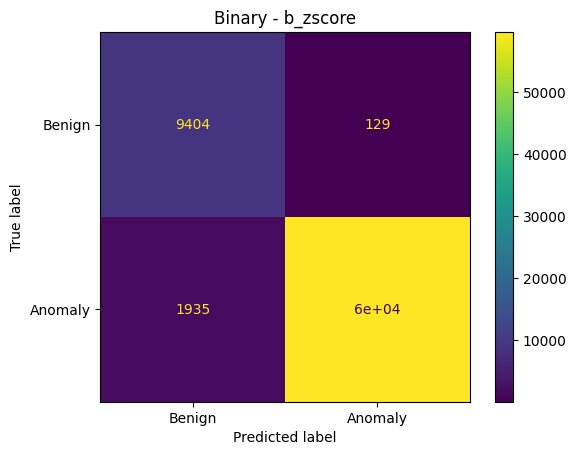

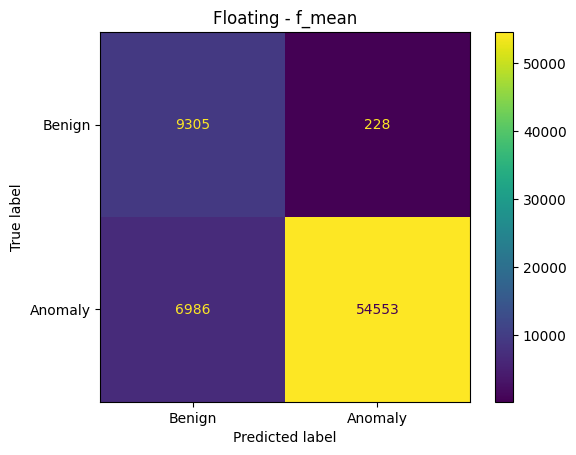

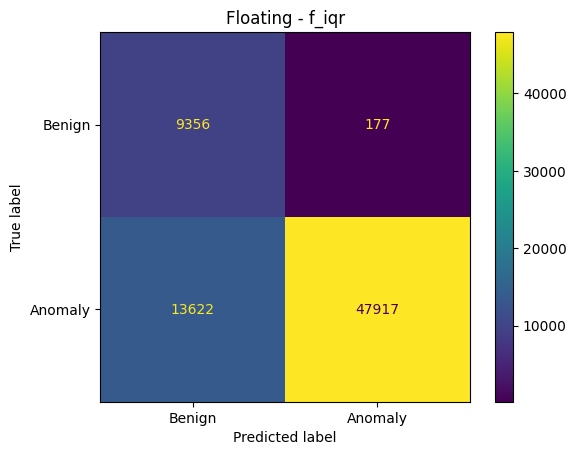

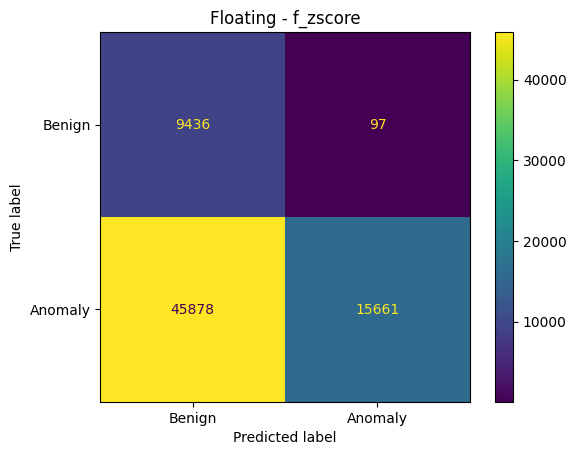

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [51]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.9916139760557376
F2-Binary-b_iqr: 0.9896158955923726
F2-Binary-b_zscore: 0.9742749821013504
F2-Floating-f_mean: 0.90638572192851
F2-Floating-f_iqr: 0.8142225998300765
F2-Floating-f_zscore: 0.29897218170849976


### FPR Score

In [52]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.020665058218818838
FPR-Binary-b_iqr: 0.017308297492919334
FPR-Binary-b_zscore: 0.013531941676282388
FPR-Floating-f_mean: 0.023916920172033986
FPR-Floating-f_iqr: 0.018567082765131648
FPR-Floating-f_zscore: 0.01017518095038288


In [53]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.9888563710040522
Accuracy-Binary-b_iqr: 0.9870413102206214
Accuracy-Binary-b_zscore: 0.9709590274651058
Accuracy-Floating-f_mean: 0.8984972985141828
Accuracy-Floating-f_iqr: 0.8058447771274201
Accuracy-Floating-f_zscore: 0.35312077892841065


In [54]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.990331,0.991614,0.020665,0.988856
b_iqr,0.987715,0.989616,0.017308,0.987041
b_zscore,0.968557,0.974275,0.013532,0.970959
f_mean,0.886478,0.906386,0.023917,0.898497
f_iqr,0.778644,0.814223,0.018567,0.805845
f_zscore,0.254489,0.298972,0.010175,0.353121


In [55]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [56]:
# %pip install openpyxl